In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer

In [6]:
df = pd.read_csv('E:\\ml_revision\\function_transformations\\datasets\\titanic_toy.csv',usecols=['Age','Fare','Survived'])

In [7]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [8]:
df.isnull().sum()

Age         177
Fare         45
Survived      0
dtype: int64

In [14]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_16840\4195263108.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
C:\Users\Aditya\AppData\Local\Temp\ipykernel_16840\4195263108.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [15]:
df.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [19]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state = 0)

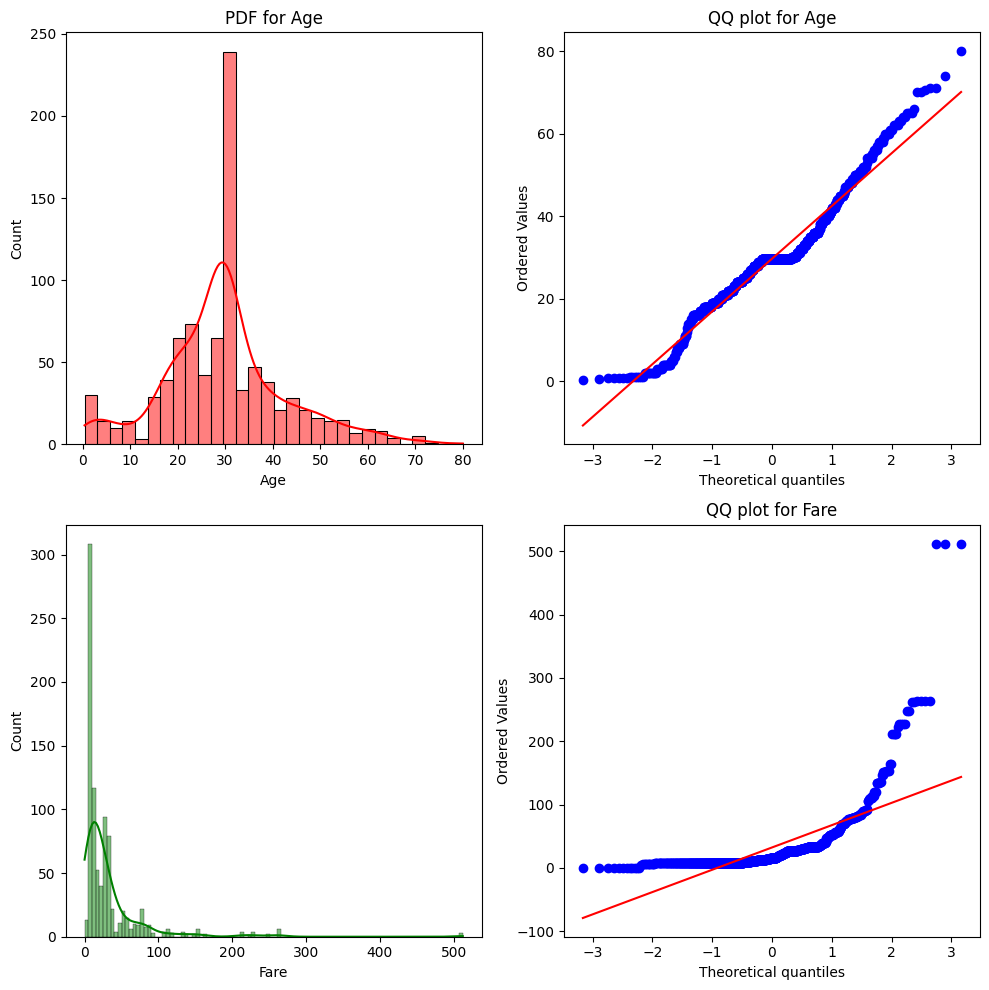

In [32]:
# visualizin the distribution of the data
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(df['Age'],kde=True,color='red')
plt.title("PDF for Age")

plt.subplot(2,2,2)
stats.probplot(df['Age'],dist='norm',plot=plt)
plt.title("QQ plot for Age")

plt.subplot(2,2,3)
sns.histplot(df['Fare'],kde=True,color='green')
plt.subplot(2,2,4)
plt.title("PDF for Fare")

stats.probplot(df['Fare'],dist='norm',plot=plt)
plt.title("QQ plot for Fare")
plt.tight_layout()
plt.show()

### Model performance before any fuction transformations: 

In [30]:
lr1 = LogisticRegression()
d_tree1 = DecisionTreeClassifier()

lr1.fit(x_train,y_train)
d_tree1.fit(x_train,y_train)

pred_lr1 = lr1.predict(x_test)
pred_d_tree1 = d_tree1.predict(x_test)

print('Logistic Regression Accuracy:',accuracy_score(y_test,pred_lr1))
print('Decision Tree Accuracy:',accuracy_score(y_test,pred_d_tree1))
print('R2 score Logistc Regression : ',r2_score(y_test,pred_lr1))

# cross validation
print('Cross validatioi score logistic regression : ', cross_val_score(lr1,x,y,cv=5).mean())

Logistic Regression Accuracy: 0.6927374301675978
Decision Tree Accuracy: 0.6871508379888268
R2 score Logistc Regression :  -0.2971014492753623
Cross validatioi score logistic regression :  0.6622434247693177


### Visualization after the fucion transformations

In [37]:
ftrf = FunctionTransformer(func=np.log1p)
x_train_transformed_log1 = ftrf.fit_transform(x_train)
x_test_transformed_log1 = ftrf.fit_transform(x_test)

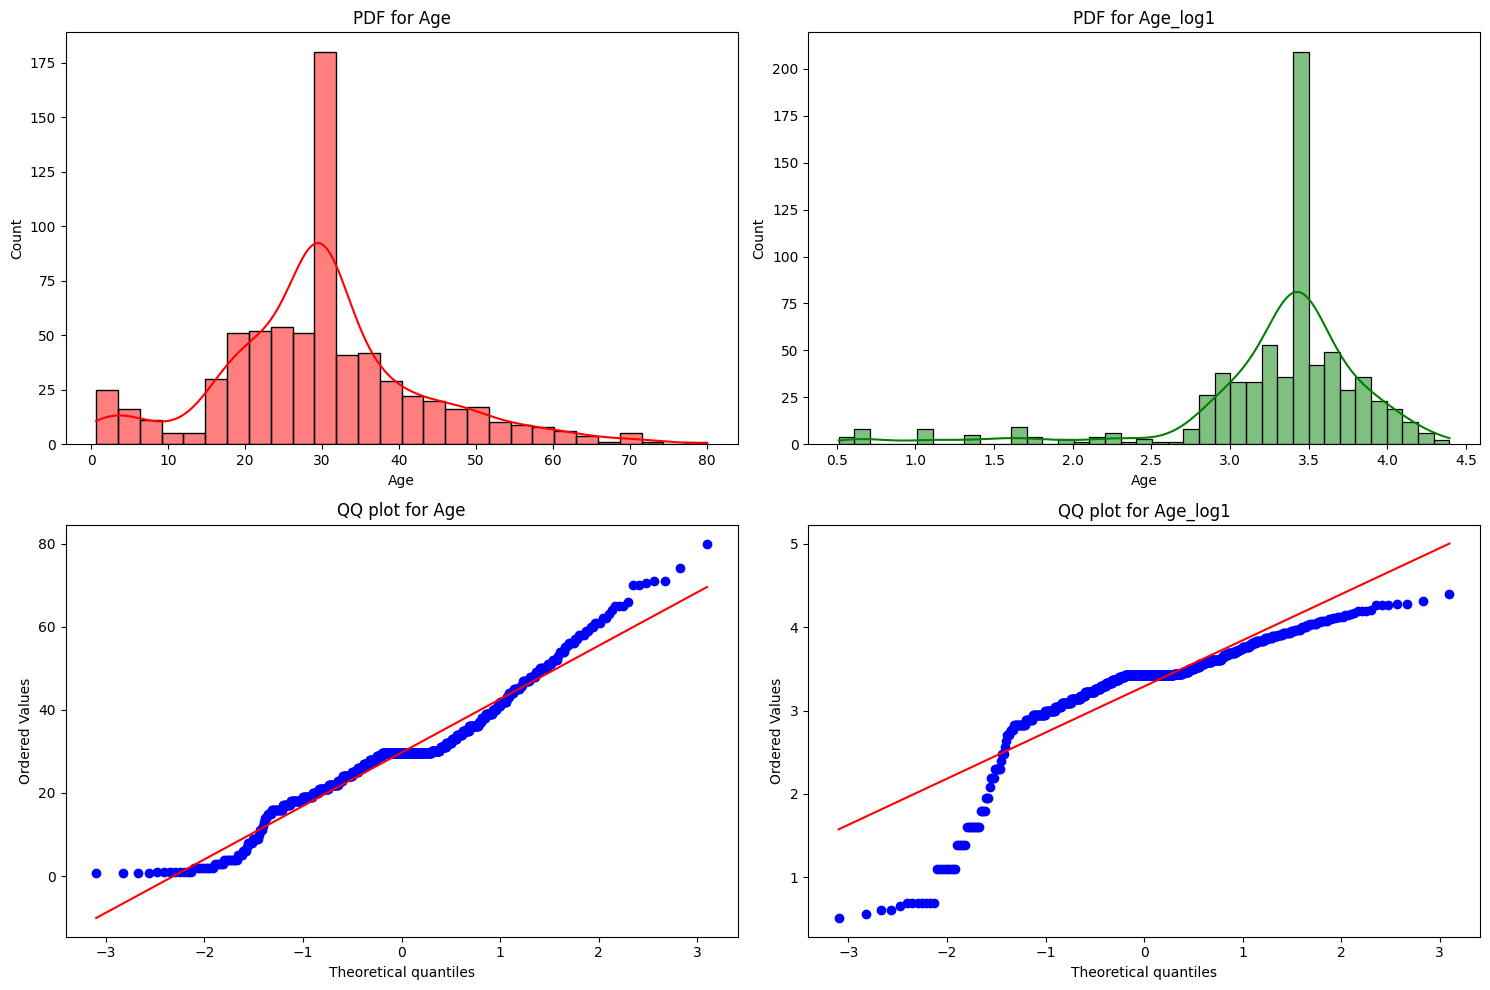

In [43]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x_train['Age'],kde=True,color='red')
plt.title("PDF for Age")

plt.subplot(2,2,2)
sns.histplot(x_train_transformed_log1['Age'],kde=True,color='green')
plt.title("PDF for Age_log1")

plt.subplot(2,2,3)
stats.probplot(x_train['Age'],dist='norm',plot = plt)
plt.title("QQ plot for Age")

plt.subplot(2,2,4)
stats.probplot(x_train_transformed_log1['Age'],dist='norm',plot=plt)
plt.title("QQ plot for Age_log1")

plt.tight_layout()
plt.show()

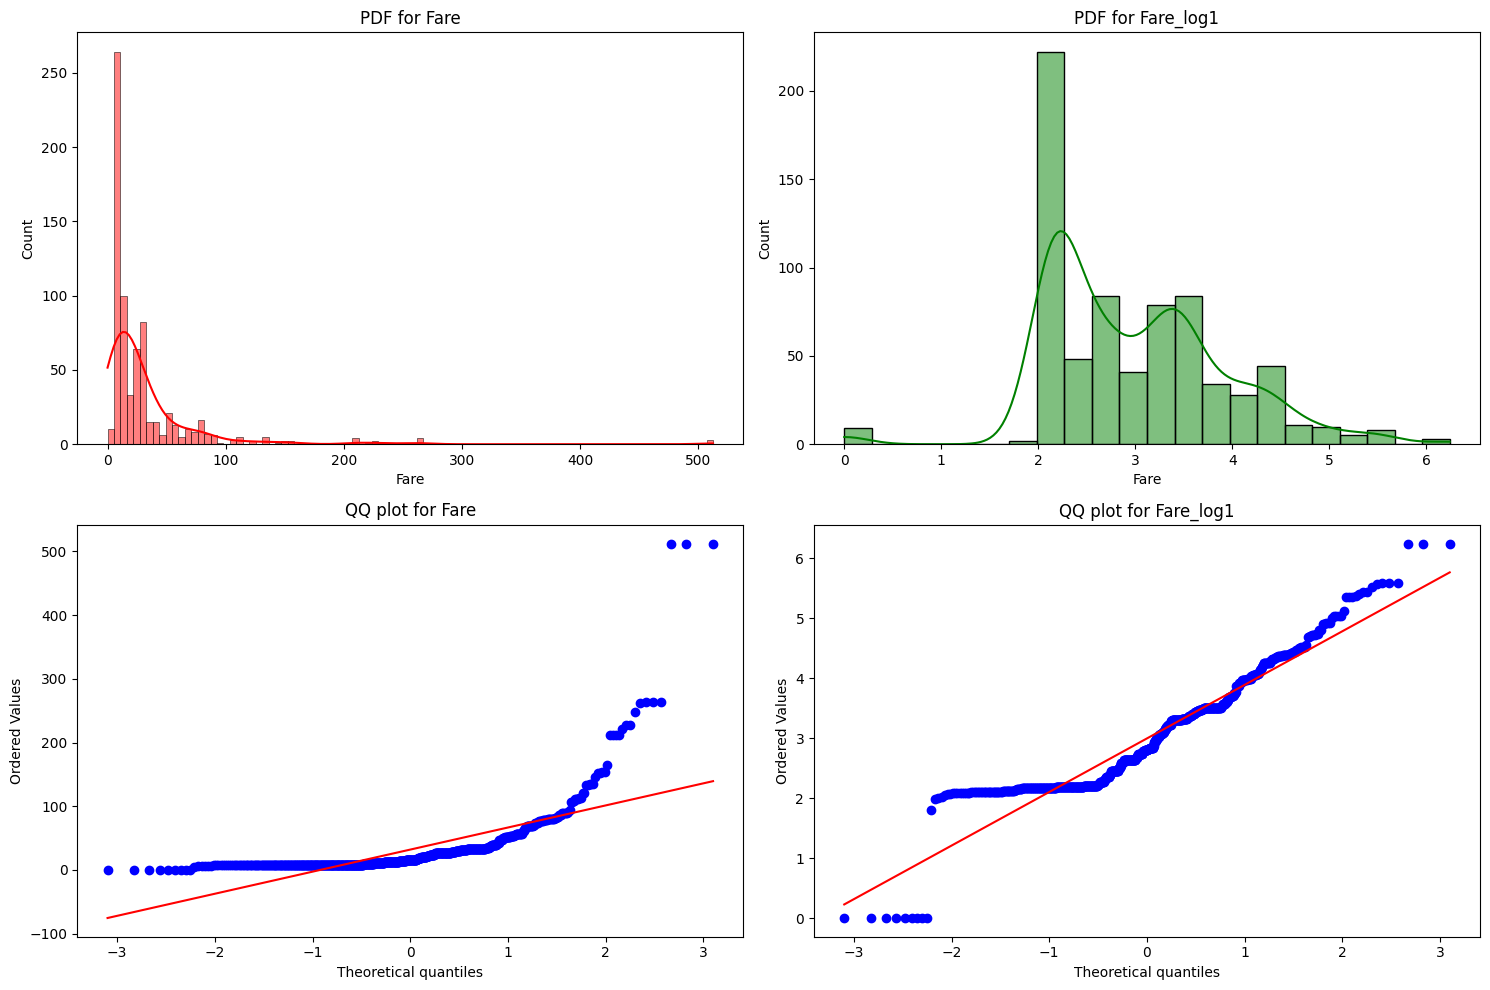

In [44]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x_train['Fare'],kde=True,color='red')
plt.title("PDF for Fare")

plt.subplot(2,2,2)
sns.histplot(x_train_transformed_log1['Fare'],kde=True,color='green')
plt.title("PDF for Fare_log1")

plt.subplot(2,2,3)
stats.probplot(x_train['Fare'],dist='norm',plot = plt)
plt.title("QQ plot for Fare")

plt.subplot(2,2,4)
stats.probplot(x_train_transformed_log1['Fare'],dist='norm',plot=plt)
plt.title("QQ plot for Fare_log1")

plt.tight_layout()
plt.show()

In [45]:
lr_log = LogisticRegression()
d_tree_log = DecisionTreeClassifier()

lr_log.fit(x_train_transformed_log1,y_train)
d_tree_log.fit(x_train_transformed_log1,y_train)

pred_lr_log = lr_log.predict(x_test_transformed_log1)
pred_d_tree_log = d_tree_log.predict(x_test_transformed_log1)

print('Logistic Regression Accuracy:',accuracy_score(y_test,pred_lr_log))
print('Decision Tree Accuracy:',accuracy_score(y_test,pred_d_tree_log))
print('R2 score Logistc Regression : ',r2_score(y_test,pred_lr_log))

# cross validation
print('Cross validation score logistic regression : ', cross_val_score(lr_log,x,y,cv=5).mean())

Logistic Regression Accuracy: 0.7039106145251397
Decision Tree Accuracy: 0.7206703910614525
R2 score Logistc Regression :  -0.2499341238471673
Cross validation score logistic regression :  0.6622434247693177


In [48]:
def transform(trans):
    ftrf = FunctionTransformer(func=trans)
    x_train_transformed = ftrf.fit_transform(x_train)
    x_test_transformed = ftrf.fit_transform(x_test)

    lr = LogisticRegression()
    d_tree = DecisionTreeClassifier()

    lr.fit(x_train_transformed,y_train)
    d_tree.fit(x_train_transformed,y_train)

    pred_lr = lr.predict(x_test_transformed)
    pred_d_tree = d_tree.predict(x_test_transformed)

    print('Logistic Regression Accuracy:',accuracy_score(y_test,pred_lr))
    print('Decision Tree Accuracy:',accuracy_score(y_test,pred_d_tree))
    print('R2 score Logistc Regression : ',r2_score(y_test,pred_lr))

    # cross validation
    print('Cross validation score logistic regression : ', cross_val_score(lr,x,y,cv=5).mean())
    

In [51]:
transform(lambda x : 1/(x+0.0001))

Logistic Regression Accuracy: 0.6312849162011173
Decision Tree Accuracy: 0.6983240223463687
R2 score Logistc Regression :  -0.5565217391304347
Cross validation score logistic regression :  0.6622434247693177
